# Propagación de la Afinidad

In [2]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs

In [3]:
centers = [[1,1], [-1,-1], [1,-1]]
X, labels = make_blobs(n_samples=300, centers= centers, cluster_std= 0.5, random_state=0)

In [4]:
import matplotlib.pyplot as plt
from itertools import cycle

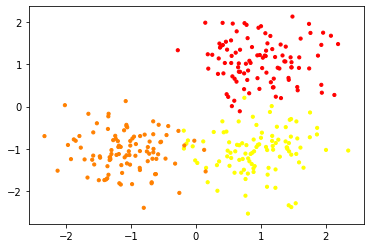

In [8]:
plt.scatter(X[:,0], X[:,1], c=labels, s = 10, cmap= "autumn")

In [9]:
af = AffinityPropagation(preference=-50).fit(X)

In [15]:
cluster_center_id = af.cluster_centers_indices_

In [17]:
labels_ap = af.labels_
n_clust = len(cluster_center_id)
n_clust

3

In [21]:
def report_affinity_propagation(X, labels):
    af = AffinityPropagation(preference=-50).fit(X)
    cluster_center_id = af.cluster_centers_indices_
    labels_ap = af.labels_
    n_clust = len(cluster_center_id)
     
        ### Primero se pone el valor real, luego el hallado
    print("Número estimado de clusters: %d" %n_clust)
    print("Homogeneidad: %0.3f" %metrics.homogeneity_score(labels, labels_ap))
    print("Completitud: %0.3f" %metrics.completeness_score(labels, labels_ap))
    print("V-Measure: %0.3f" %metrics.v_measure_score(labels, labels_ap))
    print("R2 ajustado: %0.3f" %metrics.adjusted_rand_score(labels, labels_ap))
    print("Información mutua ajustada: %0.3f" %metrics.adjusted_mutual_info_score(labels, labels_ap))
    print("Coeficiente de la silueta: %0.3f" %metrics.silhouette_score(X, labels, metric="sqeuclidean"))
    
    plt.figure(figsize=(16,9))
    plt.clf()
    
    colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
    for k, col in zip(range(n_clust), colors):
        class_member = (labels_ap == k)
        clust_center = X[cluster_center_id[k]]
        plt.plot( X[class_member,0], X[class_member,1], col + '.')
        plt.plot(clust_center[0], clust_center[1], 'o', markerfacecolor= col, markeredgecolor='k', markersize=14)
        for x in X[class_member]:
            plt.plot( [clust_center[0], x[0]], [clust_center[1], x[1]], col)
            
    plt.title("Numero estimado de clusters: %d" %n_clust)
    plt.show()

Número estimado de clusters: 3
Homogeneidad: 0.872
Completitud: 0.872
V-Measure: 0.872
R2 ajustado: 0.912
Información mutua ajustada: 0.871
Coeficiente de la silueta: 0.735


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


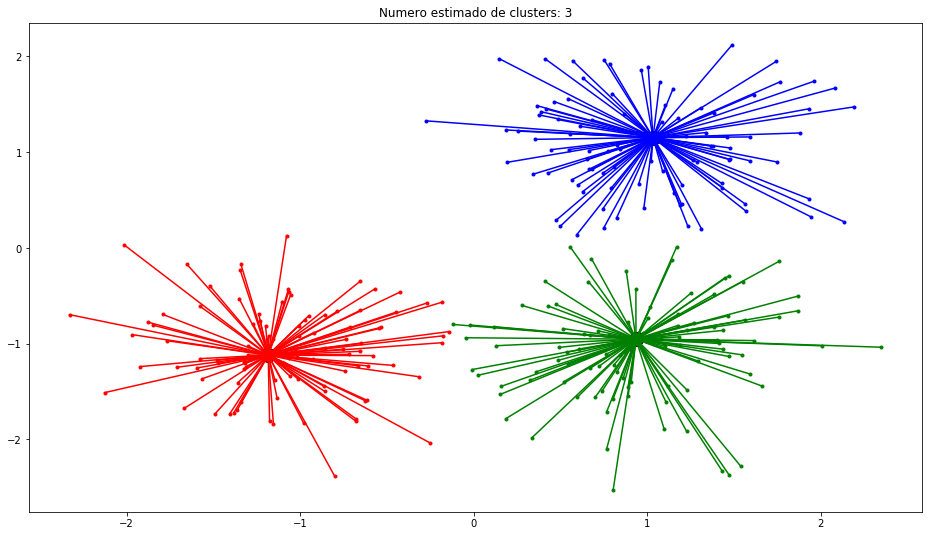

In [22]:
report_affinity_propagation(X,labels)